In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

### Load files from monthly averages

In [3]:
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)} 
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']


# Temporary list dict
data = {}

# Permanent aggregate dict
aggregates = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
    
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
# Calculate climatological mean and anomalies
for var in variables:
    aggregates[var]['mean'] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
    for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var]['mean']

In [4]:
print(np.shape(aggregates['diatoms'][2015][:]))

(50, 50)


In [5]:
# Reset variables for plotting
tmask = tmask[0, 0, ...]
variables = ['diatoms']

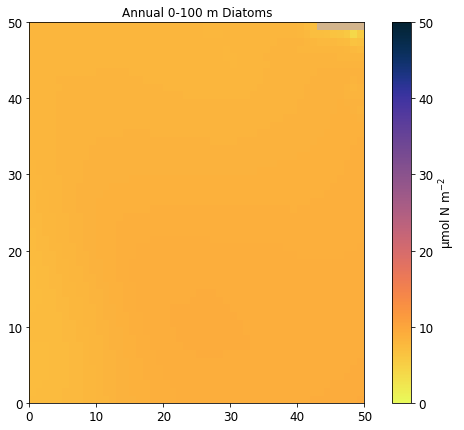

In [6]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')
vmin=0
vmax=50
cmap1=cmocean.cm.thermal_r
cmap1.set_bad('tan')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms']['mean']))),cmap=cmap1,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('Annual 0-100 m Diatoms')
fig.colorbar(m0,ax=ax,label='\u03bcmol N m$^{-2}$')




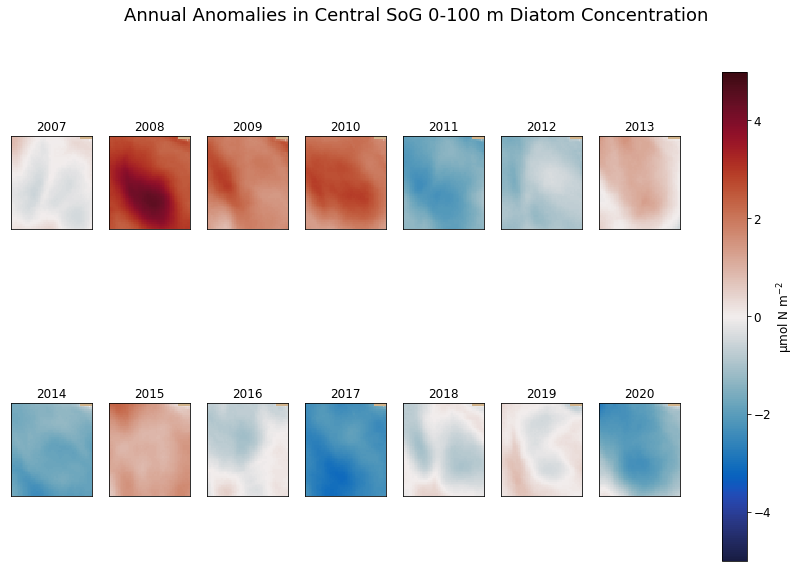

In [7]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-5
vmax=5

fig,ax=plt.subplots(2,7,figsize=(15,9))
fig.suptitle('Annual Anomalies in Central SoG 0-100 m Diatom Concentration', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2007]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2007')
ax[0,0].yaxis.set_visible(False)
ax[0,0].xaxis.set_visible(False)
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2008]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2008')
ax[0,1].yaxis.set_visible(False)
ax[0,1].xaxis.set_visible(False)
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2009]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2009')
ax[0,2].yaxis.set_visible(False)
ax[0,2].xaxis.set_visible(False)
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2010]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2010')
ax[0,3].yaxis.set_visible(False)
ax[0,3].xaxis.set_visible(False)
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2011]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2011')
ax[0,4].yaxis.set_visible(False)
ax[0,4].xaxis.set_visible(False)
ax[0,4].yaxis.set_visible(False)

m0=ax[0,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2012]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,5],coords='grid')
ax[0,5].set_title('2012')
ax[0,5].yaxis.set_visible(False)
ax[0,5].xaxis.set_visible(False)
ax[0,5].yaxis.set_visible(False)

m0=ax[0,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2013]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,6],coords='grid')
ax[0,6].set_title('2013')
ax[0,6].yaxis.set_visible(False)
ax[0,6].xaxis.set_visible(False)
ax[0,6].yaxis.set_visible(False)

m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2014]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2014')
ax[1,0].yaxis.set_visible(False)
ax[1,0].xaxis.set_visible(False)
ax[1,0].yaxis.set_visible(False)

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2015]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2015')
ax[1,1].yaxis.set_visible(False)
ax[1,1].xaxis.set_visible(False)
ax[1,1].yaxis.set_visible(False)

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2016]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2016')
ax[1,2].yaxis.set_visible(False)
ax[1,2].xaxis.set_visible(False)
ax[1,2].yaxis.set_visible(False)

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2017]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2017')
ax[1,3].yaxis.set_visible(False)
ax[1,3].xaxis.set_visible(False)
ax[1,3].yaxis.set_visible(False)

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2018]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2018')
ax[1,4].yaxis.set_visible(False)
ax[1,4].xaxis.set_visible(False)
ax[1,4].yaxis.set_visible(False)

m0=ax[1,5].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2019]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,5],coords='grid')
ax[1,5].set_title('2019')
ax[1,5].yaxis.set_visible(False)
ax[1,5].xaxis.set_visible(False)
ax[1,5].yaxis.set_visible(False)

m0=ax[1,6].pcolormesh(np.ma.masked_where(tmask==0,((aggregates['diatoms'][2020]))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,6],coords='grid')
ax[1,6].set_title('2020')
ax[1,6].yaxis.set_visible(False)
ax[1,6].xaxis.set_visible(False)
ax[1,6].yaxis.set_visible(False)

fig.colorbar(m0,ax=ax,label='\u03bcmol N m$^{-2}$')



### Plot Seasonal Cycles for Individual Years

In [8]:

#years, months, data
monthly_array_diatoms_depthint_slice = np.zeros([14,12,50,50])
# Load monthly averages
mask = xr.open_dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')
slc = {'y': slice(450,500), 'x': slice(250,300)}
e3t, tmask = [mask[var].isel(z=slice(None, 27),**slc).values for var in ('e3t_0', 'tmask')]
years, variables = range(2007, 2021), ['diatoms']
# Temporary list dict
data = {}
# Permanent aggregate dict
aggregates = {var: {} for var in variables}
monthlydat = {var: {} for var in variables}

# Loop through years
for year in [2007,2008,2009,2010,2011,2012,2016,2017,2018,2019,2020]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)

# Loop through years for wrap files
for year in [2013,2014,2015]:
    # Initialize lists
    for var in variables: data[var] = []
    # Load monthly averages
    for month in range(1, 13):
        datestr = f'{year}{month:02d}'
        prefix = f'/data/sallen/results/MEOPAR/v201905r_wrap/SalishSea_1m_{datestr}_{datestr}'
        
        # Load grazing variables
        with xr.open_dataset(prefix + '_ptrc_T.nc') as ds:
            q = np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data
            q2 = q[0,:,:]
            monthly_array_diatoms_depthint_slice[year-2007,month-1,:,:] = q2 #year2015 is index 0 along 1st dimension
            for var in ['diatoms']:
                data[var].append(np.ma.masked_where(tmask == 0, ds[var].isel(deptht=slice(None, 27), **slc).values * e3t).sum(axis=1).data)
    
    # Concatenate months
    for var in variables: aggregates[var][year] = np.concatenate(data[var]).mean(axis=0)
        
# # Calculate 5 year mean and anomalies
# for var in variables:
#     aggregates[var][‘mean’] = np.concatenate([aggregates[var][year][None, ...] for year in years]).mean(axis=0)
#     for year in years: aggregates[var][year] = aggregates[var][year] - aggregates[var][‘mean’]



(14, 12)


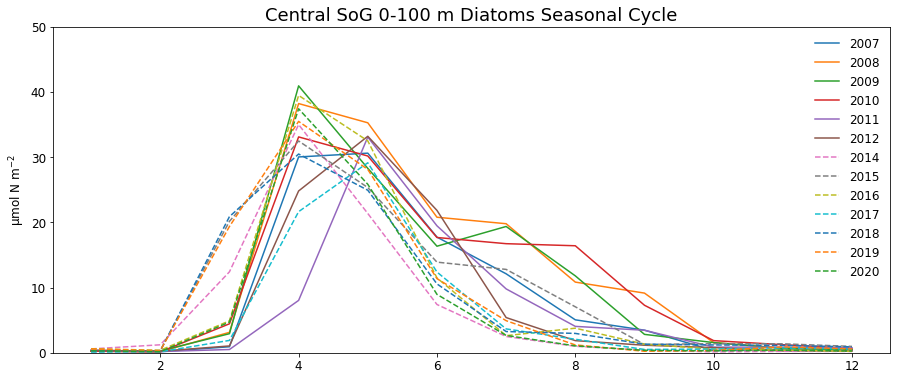

In [25]:
monthly_array_diatoms_depthint_slice[monthly_array_diatoms_depthint_slice == 0 ] = np.nan
monthly_array_diatoms_depthint_slicemean = \
np.nanmean(np.nanmean(monthly_array_diatoms_depthint_slice, axis = 2),axis = 2)
print(np.shape(monthly_array_diatoms_depthint_slicemean))


#plot monthly means for 5 years
fig, ax = plt.subplots(figsize=(15, 6))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


for i in range(0,6):
    ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[i,:],label=2007+i)
    ax.set_title('Central SoG Diatom Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False)
    ax.set_ylim(0,125)
    ax.set_ylabel('\u03bcmol N m$^{-2}$')
   
for i in range(7,14):
    ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[i,:],linestyle='--',label=2007+i)
    ax.set_title('Central SoG 0-100 m Diatoms Seasonal Cycle',fontsize=18)
    ax.legend(frameon=False,bbox_to_anchor=(1, 1))
    ax.set_ylim(0,50)
    ax.set_ylabel('\u03bcmol N m$^{-2}$')

### Assign years to either NPGO+ or NPGO-

In [10]:
NPGOpositive=(((monthly_array_diatoms_depthint_slicemean[0,:]+monthly_array_diatoms_depthint_slicemean[1,:]+\
        monthly_array_diatoms_depthint_slicemean[2,:]+monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[5,:]+\
        monthly_array_diatoms_depthint_slicemean[6,:])/7))

In [11]:
monthly_array_diatoms_depthint_slicemean[5,:]

array([ 0.38555823,  0.24206305,  1.05099239, 24.80959449, 33.1924934 ,
       21.83003552,  5.40134614,  1.86319762,  1.16049214,  0.79618086,
        0.28457123,  0.24791801])

In [12]:
NPGOpositive

array([ 0.28088872,  0.20378592,  2.50595424, 30.97956228, 31.3790246 ,
       18.20377152, 13.43047964,  8.17655368,  4.00987535,  1.13281191,
        0.75095057,  0.5721887 ])

In [13]:
NPGOnegative=(((monthly_array_diatoms_depthint_slicemean[7,:]+monthly_array_diatoms_depthint_slicemean[8,:]+\
        monthly_array_diatoms_depthint_slicemean[9,:]+monthly_array_diatoms_depthint_slicemean[10,:]+\
        monthly_array_diatoms_depthint_slicemean[11,:]+monthly_array_diatoms_depthint_slicemean[12,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/7))

In [14]:
NPGOnegative

array([ 0.38486536,  0.41670082, 12.04601094, 33.12840812, 26.73889162,
       10.86414044,  4.63189149,  2.73370202,  0.77847969,  0.64738198,
        0.74181838,  0.5380554 ])

In [15]:
NPGOpositive.mean()

9.302153927839893

In [16]:
NPGOnegative.mean()

7.804195520970524

Text(0, 0.5, 'μmol N m$^{-2}$')

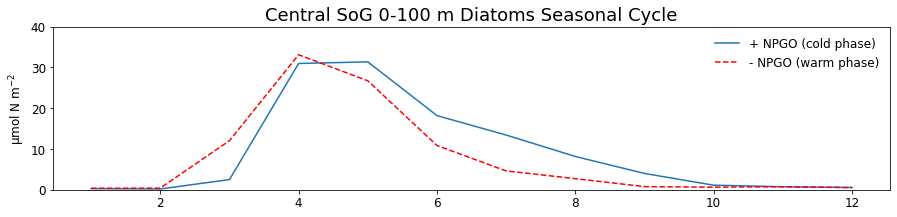

In [17]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGOpositive,label='+ NPGO (cold phase)')
ax.plot(np.arange(1,13), NPGOnegative,linestyle='--',label='- NPGO (warm phase)',color='r')
ax.set_title('Central SoG 0-100 m Diatoms Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,40)
ax.set_ylabel('\u03bcmol N m$^{-2}$')
   

In [18]:
Random1=(((monthly_array_diatoms_depthint_slicemean[0,:]+monthly_array_diatoms_depthint_slicemean[2,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[6,:]+\
        monthly_array_diatoms_depthint_slicemean[8,:]+monthly_array_diatoms_depthint_slicemean[10,:]+\
        monthly_array_diatoms_depthint_slicemean[12,:])/7))

In [19]:
Random2=(((monthly_array_diatoms_depthint_slicemean[1,:]+monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[5,:]+monthly_array_diatoms_depthint_slicemean[7,:]+\
        monthly_array_diatoms_depthint_slicemean[9,:]+monthly_array_diatoms_depthint_slicemean[11,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/7))

Text(0, 0.5, 'μmol N m$^{-2}$')

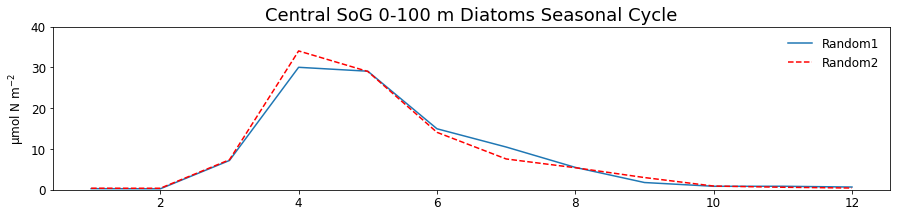

In [20]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), Random1,label='Random1')
ax.plot(np.arange(1,13), Random2,linestyle='--',label='Random2',color='r')
ax.set_title('Central SoG 0-100 m Diatoms Seasonal Cycle',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,40)
ax.set_ylabel('\u03bcmol N m$^{-2}$')

### Select 4 warmest and 4 coldest years; leave NPGO "neutral" years out

In [21]:
#2008, 2010, 2011, 2012
NPGO_C=(((+monthly_array_diatoms_depthint_slicemean[1,:]+\
        monthly_array_diatoms_depthint_slicemean[3,:]+\
        monthly_array_diatoms_depthint_slicemean[4,:]+monthly_array_diatoms_depthint_slicemean[5,:])/4))

In [22]:
#2017, 2018, 2019, 2020
NPGO_W=(((monthly_array_diatoms_depthint_slicemean[10,:]+\
        monthly_array_diatoms_depthint_slicemean[11,:]+monthly_array_diatoms_depthint_slicemean[12,:]+\
        monthly_array_diatoms_depthint_slicemean[13,:])/4))

Text(0, 0.5, 'mmol N m$^{-2}$')

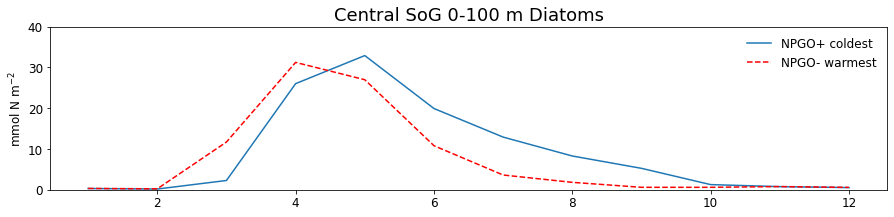

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), NPGO_C,label='NPGO+ coldest')
ax.plot(np.arange(1,13), NPGO_W,linestyle='--',label='NPGO- warmest',color='r')
ax.set_title('Central SoG 0-100 m Diatoms',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,40)
ax.set_ylabel('mmol N m$^{-2}$')

Text(0, 0.5, 'mmol N m$^{-2}$')

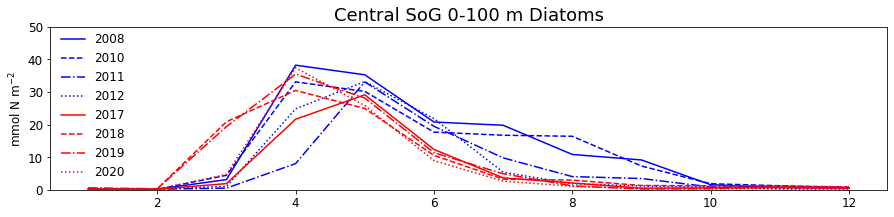

In [24]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]


ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[1,:],color='b',linestyle='-',label='2008')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[3,:],color='b',linestyle='--',label='2010')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[4,:],color='b',linestyle='-.',label='2011')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[5,:],color='b',linestyle=':',label='2012')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[10,:],color='r',linestyle='-',label='2017')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[11,:],color='r',linestyle='--',label='2018')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[12,:],color='r',linestyle='-.',label='2019')
ax.plot(np.arange(1,13), monthly_array_diatoms_depthint_slicemean[13,:],color='r',linestyle=':',label='2020')

ax.set_title('Central SoG 0-100 m Diatoms',fontsize=18)
ax.legend(frameon=False)
ax.set_ylim(0,50)
ax.set_ylabel('mmol N m$^{-2}$')